# BatDetect - Colab Demo

This notebook illustrates how to use Google Colab to run the bat detection code. Click [here](https://colab.research.google.com/github/macaodha/batdetect_v3/blob/master/bat_detect_colab_notebook.ipynb) to run it on Colab.  

Make sure to enable GPU usage on Colab for this Notebook to make it run faster. 


## WORK IN PROGRESS - NOT FULLY WORKING YET

Current problem is realted to cloning a private repository on Github.  
As a result it just works locally at the moment.  

In [1]:
# clone the code
# WARNING - this currently does not work as the repo is private
#!git clone https://github.com/macaodha/batdetect_v3

In [2]:
# import the necessary libraries
import os
import glob
import config
import matplotlib.pyplot as plt

import bat_detect.utils.detector_utils as du
import bat_detect.utils.audio_utils as au
import bat_detect.utils.plot_utils as viz

ModuleNotFoundError: No module named 'librosa'

In [ ]:
# setup the arguments
args = {}
args['detection_threshold'] = 0.3
args['time_expansion_factor'] = 1
args['model_url'] = config.MODEL_URL
args['model_path'] = os.path.join('models', os.path.basename(args['model_url']))

args['cnn_features'] = False
args['spec_features'] = False
args['quiet'] = True
args['save_preds_if_empty'] = False
args['spec_slices'] = False
args['chunk_size'] = 3

In [4]:
# load the model
model, params = du.load_model(args['model_url'], args['model_path'])

In [5]:
# choose an audio file
audio_file = 'example_data/audio/20180530_213516-EPTSER-LR_0_0.5.wav'

In [6]:
# run the model
results = du.process_file(audio_file, model, params, args)

/home/omacaod/anaconda3/envs/pytorch1.9/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/omacaod/anaconda3/envs/pytorch1.9/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/wo

In [7]:
# print summary info for the individual detections 
print('Results for ' + results['pred_dict']['id'])
print('{} calls detected\n'.format(len(results['pred_dict']['annotation'])))

print('time\tprob\tlfreq\tspecies_name')
for ann in results['pred_dict']['annotation']:
    print('{}\t{}\t{}\t{}'.format(ann['start_time'], ann['class_prob'], ann['low_freq'], ann['class']))

Results for 20180530_213516-EPTSER-LR_0_0.5.wav
20 calls detected

time	prob	lfreq	species_name
0.0085	0.744	27187	Eptesicus serotinus
0.0205	0.453	46093	Pipistrellus pipistrellus
0.0445	0.668	46953	Pipistrellus pipistrellus
0.1025	0.729	44375	Pipistrellus pipistrellus
0.1255	0.591	46953	Pipistrellus pipistrellus
0.1625	0.696	28046	Eptesicus serotinus
0.1975	0.618	46093	Pipistrellus pipistrellus
0.2175	0.507	47812	Pipistrellus pipistrellus
0.2775	0.201	33203	Eptesicus serotinus
0.2855	0.749	45234	Pipistrellus pipistrellus
0.3085	0.239	30625	Eptesicus serotinus
0.3155	0.621	27187	Eptesicus serotinus
0.3455	0.319	27187	Eptesicus serotinus
0.3735	0.69	46093	Pipistrellus pipistrellus
0.4005	0.34	31484	Eptesicus serotinus
0.4115	0.386	27187	Eptesicus serotinus
0.4305	0.393	30625	Eptesicus serotinus
0.4435	0.332	27187	Eptesicus serotinus
0.4575	0.45	46093	Pipistrellus pipistrellus
0.4755	0.719	28046	Eptesicus serotinus


In [8]:
# read the audio file 
sampling_rate, audio = au.load_audio_file(audio_file, args['time_expansion_factor'], params['target_samp_rate'], params['scale_raw_audio'])
duration = audio.shape[0] / sampling_rate
print('File duration: {} seconds'.format(duration))

File duration: 0.5 seconds


In [9]:
# generate spectrogram for visualization
spec, spec_viz = au.generate_spectrogram(audio, sampling_rate, params, True, False)

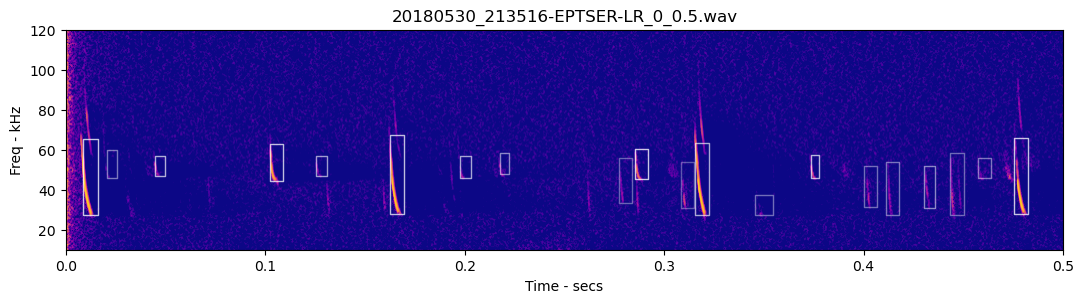

In [10]:
# display the detections on top of the spectrogram
# note, if the audio file is very long, this image will be very large - best to crop the audio first
start_time = 0.0
detections = [ann for ann in results['pred_dict']['annotation']]
fig = plt.figure(1, figsize=(spec.shape[1]/100, spec.shape[0]/100), dpi=100, frameon=False)
spec_duration = au.x_coords_to_time(spec.shape[1], sampling_rate, params['fft_win_length'], params['fft_overlap'])
viz.create_box_image(spec, fig, detections, start_time, start_time+spec_duration, spec_duration, params, spec.max()*1.1, False)
plt.ylabel('Freq - kHz')
plt.xlabel('Time - secs')
plt.title(os.path.basename(audio_file))
plt.show()

## Run on audio files stored in your Google Drive
## WIP

In [11]:
# mount your Google Drive in Colab
# this will open a new browser window, ask you to give permission, 
# and then give you an access code you can paste here
#from google.colab import drive
#drive.mount('/content/drive')

We will assume that you have some audio files in directory called `sample_bat_audio` in your Google Drive. 

In [12]:
# load the audio files from Google Drive
#root_dir = "drive/My Drive/"
#audio_dir = root_dir + 'sample_bat_audio/'
#files = glob.glob(audio_dir + '*.wav')
#print('Found {} audio files.'.format(len(files)))